In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [44]:
#initialize
alpha = 4
length = 1
time = 1

In [45]:
 #Define the PDE (Heat equation)
def heat_equation(x, u):
    du_t = dde.grad.jacobian(u, x, i=0, j=1)
    du_xx = dde.grad.hessian(u, x, i=0, j=0)
    return du_t - alpha * du_xx


In [46]:
x_min, x_max = 0, length
t_min, t_max = 0, time

# Domain
geom = dde.geometry.Interval(x_min, x_max)
timedomain = dde.geometry.TimeDomain(t_min, t_max)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)


In [47]:
ic = dde.icbc.IC(geomtime, lambda x: 20+ np.ones((len(x),1)), lambda _, on_initial: on_initial,)
bc = dde.DirichletBC(geomtime, lambda x: 100, lambda _, on_boundary: on_boundary)


In [53]:
data = dde.data.TimePDE(
    geomtime, heat_equation, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160,num_test=2450
)

In [62]:
# Inspect train data
print("Train Points:", data.train_points)
print("Train X:", data.train_x)
print("Train Y:", data.train_y)

# Inspect test data
print("Test Points:", data.test_points)
print("Test X:", data.test_x)
print("Test Y:", data.test_y)


Train Points: <bound method TimePDE.train_points of <deepxde.data.pde.TimePDE object at 0x000002856FA58950>>
Train X: [[1.         0.765625  ]
 [1.         0.421875  ]
 [1.         0.734375  ]
 ...
 [0.34204102 0.99881935]
 [0.842041   0.9992129 ]
 [0.21704102 0.99960643]]
Train Y: None
Test Points: <bound method PDE.test_points of <deepxde.data.pde.TimePDE object at 0x000002856FA58950>>
Test X: [[1.         0.765625  ]
 [1.         0.421875  ]
 [1.         0.734375  ]
 ...
 [0.9411765  0.02040816]
 [0.9607843  0.02040816]
 [0.98039216 0.02040816]]
Test Y: None


In [63]:
net = dde.nn.FNN([2] + [20] * 3 + [1], "sigmoid", "Glorot uniform")


In [64]:
model = dde.Model(data, net)

# Compile model
model.compile("adam", lr=0.001)

Compiling model...
Building feed-forward neural network...


c:\Users\Shashidhar bhat n\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.228326 s

'compile' took 1.390044 s



In [65]:
losshistory, train_state = model.train(epochs=15000)


Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.51e-06, 1.01e+04, 4.54e+02]    [7.74e-06, 1.01e+04, 4.54e+02]    []  
1000      [1.47e-05, 7.09e+03, 2.68e+01]    [1.40e-05, 7.09e+03, 2.68e+01]    []  
2000      [3.70e-06, 5.09e+03, 5.89e+01]    [3.44e-06, 5.09e+03, 5.89e+01]    []  
3000      [1.99e-06, 3.57e+03, 3.70e+02]    [1.83e-06, 3.57e+03, 3.70e+02]    []  
4000      [7.01e-07, 2.55e+03, 8.13e+02]    [6.36e-07, 2.55e+03, 8.13e+02]    []  
5000      [4.34e-07, 1.94e+03, 1.22e+03]    [3.91e-07, 1.94e+03, 1.22e+03]    []  
6000      [3.77e-07, 1.65e+03, 1.47e+03]    [3.37e-07, 1.65e+03, 1.47e+03]    []  
7000      [4.73e-07, 1.57e+03, 1.55e+03]    [4.20e-07, 1.57e+03, 1.55e+03]    []  
8000      [3.09e-06, 1.56e+03, 1.56e+03]    [2.71e-06, 1.56e+03, 1.56e+03]    []  
9000      [2.98e+01, 6.30e+02, 6.69e+01]    [1.95e+01, 6.30e+02, 6.69e+01]    []  
10000     [1.02e+01, 1.95e+02, 7.07e+01]    [4.98e+00, 1.95e+

Saving loss history to c:\Users\Shashidhar bhat n\internship\loss.dat ...
Saving training data to c:\Users\Shashidhar bhat n\internship\train.dat ...
Saving test data to c:\Users\Shashidhar bhat n\internship\test.dat ...


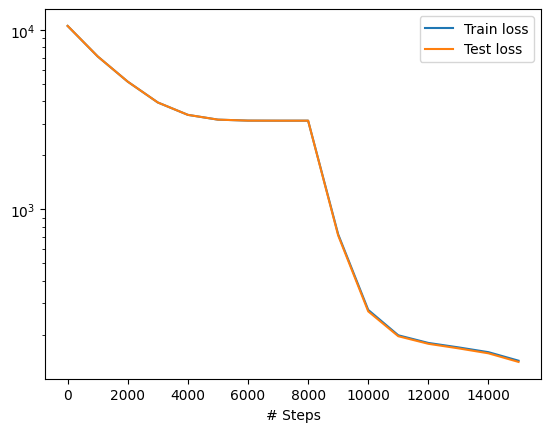

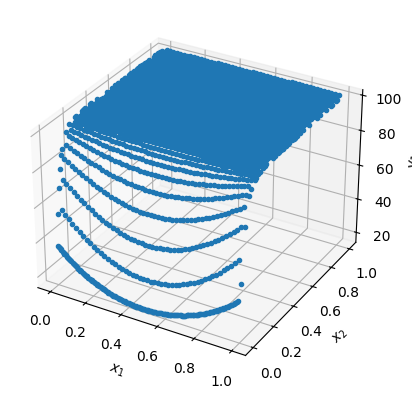

In [66]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)